Insurance data analysis project

In [ ]:
#import libraries and read the file
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")
df=pd.read_csv("insurance.csv")
df.head(5)

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [2]:
#Drop unnecessary coloumns
df.drop(["bmi"], axis=1, inplace = True)
df.head()

,age,sex,children,smoker,region,charges
0,19,female,0,yes,southwest,16884.92400
1,18,male,1,no,southeast,1725.55230
2,28,male,3,no,southeast,4449.46200
3,33,male,0,no,northwest,21984.47061
4,32,male,0,no,northwest,3866.85520


In [3]:
#Display datatypes of coloumns
dtypes=df.dtypes
n_uniq=df.nunique()
pd.DataFrame({"Dtypes":dtypes,"Num_Uniqe":n_uniq}).T

,age,sex,children,smoker,region,charges
Dtypes,int64,object,int64,object,object,float64
Num_Uniqe,47,2,6,2,4,1337


In [4]:
#Change incorrect data types (convert to category datatype)
cols = [ "sex", "smoker", "region"]
df[cols] = df[cols].astype('category')
pd.DataFrame(df.dtypes).T

,age,sex,children,smoker,region,charges
0,int64,category,int64,category,category,float64


In [5]:
#Check for null values in each coloumn and calculate ratio of nulls in each coloumn
null=df.isnull().sum()
ratio=null/df.shape[0]
pd.DataFrame({"Null_sum":null,"Ratio":ratio}).T

,age,sex,children,smoker,region,charges
Null_sum,0.0,0.0,0.0,0.0,0.0,0.0
Ratio,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
# check duplicates
df.duplicated().sum()

np.int64(1)

In [ ]:
#Remove duplicates
df.drop_duplicates(inplace=True)


In [ ]:
# Check for duplicates again after removing duplicates
df.duplicated().sum()

np.int64(0)

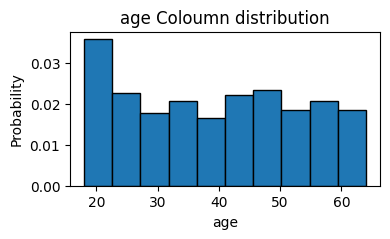

In [9]:
import matplotlib.pyplot as plt
plt.figure(figsize=(4, 2))
plt.hist(df['age'], density=True, edgecolor="black")
plt.title("age Coloumn distribution")
plt.xlabel("age")
plt.ylabel("Probability")
plt.show()

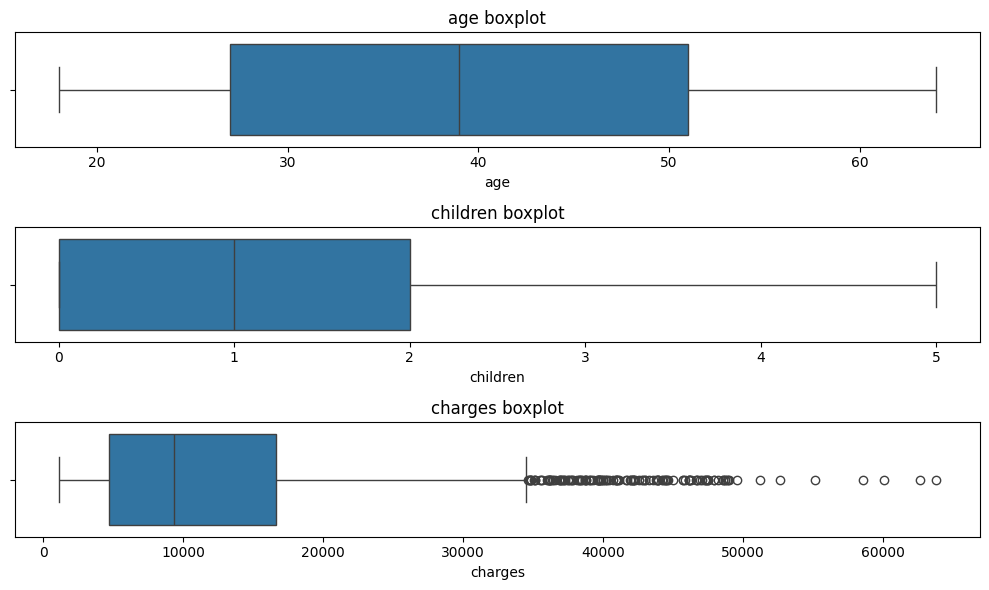

In [ ]:
# check for outliers
num_cols = df.select_dtypes("number").columns
plt.figure(figsize=(10, len(num_cols) *2))
for i, col in enumerate(num_cols,1):
    plt.subplot(len(num_cols), 1, i)
    sns.boxplot(df[col], orient="h")
    plt.title(f"{col} boxplot")
plt.tight_layout()
plt.show()

In [ ]:
#Remove outliers(replace them with lower fence or upper fence)
for col in num_cols:
    Q1 = df[col].quantile(.25)
    Q3 = df[col].quantile(.75)
    IQR = Q3 - Q1
    Lower_Fence = Q1 - 1.5 * IQR
    Upper_Fence = Q3 + 1.5 * IQR
    Lower_Outliers = df[df[col] < Lower_Fence][col].values
    Upper_Outliers = df[df[col] > Upper_Fence][col].values
    df[col].replace(Lower_Outliers, Lower_Fence, inplace=True)
    df[col].replace(Upper_Outliers, Upper_Fence, inplace=True)

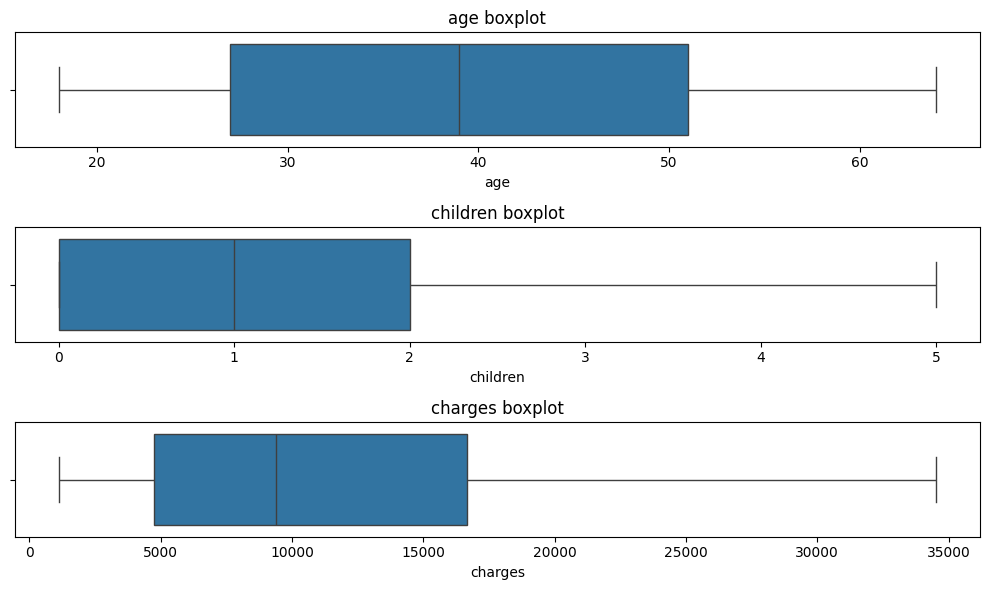

In [18]:
#Make sure that outliers were removed
num_cols = df.select_dtypes("number").columns
plt.figure(figsize=(10, len(num_cols) *2))
for i, col in enumerate(num_cols,1):
    plt.subplot(len(num_cols), 1, i)
    sns.boxplot(df[col], orient="h")
    plt.title(f"{col} boxplot")
plt.tight_layout()
plt.show()

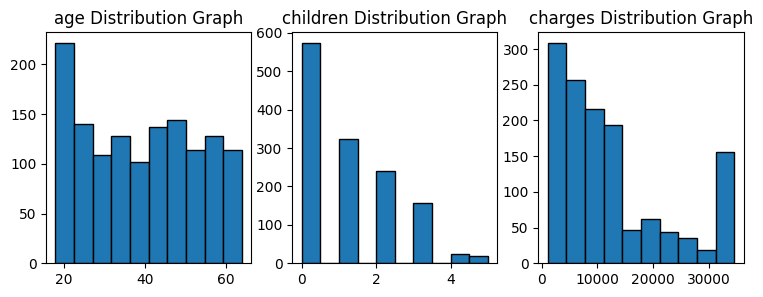

In [21]:
# Histogram
num_cols = df.select_dtypes("number").columns
plt.figure(figsize=(9, 3))
for i, col in enumerate(num_cols):
    plt.subplot(1, 3, i+1)
    plt.hist(df[col], edgecolor="black")
    plt.title(f"{col} Distribution Graph")
plt.show()

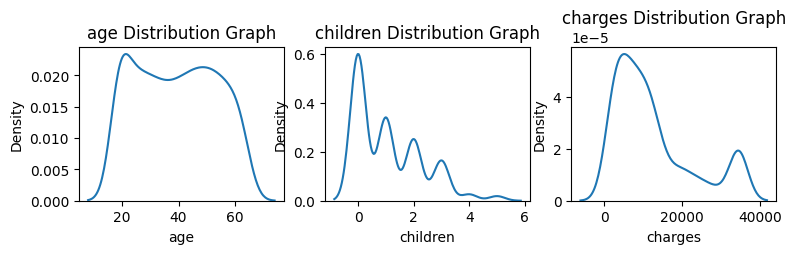

In [22]:
# Kde Plot
import matplotlib.pyplot as plt
num_cols = df.select_dtypes("number").columns
plt.figure(figsize=(9, 2))
for i, col in enumerate(num_cols):
    plt.subplot(1, 3, i+1)
    sns.kdeplot(df[col])
    plt.title(f"{col} Distribution Graph")
plt.show()

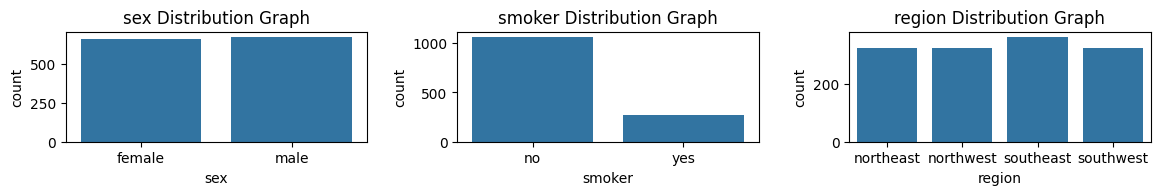

In [23]:
# Count Plot
import matplotlib.pyplot as plt
cat_cols = df.select_dtypes("category").columns
plt.figure(figsize=(14, 4))
for i, col in enumerate(cat_cols):
    plt.subplot(2, 3, i+1)
    sns.countplot(x=col, data=df)
    plt.title(f"{col} Distribution Graph")
plt.subplots_adjust(hspace=.8, wspace=.3)
plt.show()

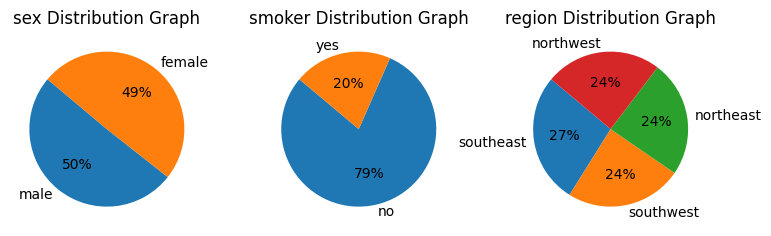

In [25]:
# Pie Plot
cat_cols = df.select_dtypes("category").columns
plt.figure(figsize=(9, 4))
for i, col in enumerate(cat_cols):
    plt.subplot(1, 3, i+1)
    unique = df[col].value_counts()
    count = unique.values
    categories = unique.index
    plt.pie(count, labels = categories, startangle=140, autopct='%1.1d%%')
    plt.title(f"{col} Distribution Graph")
plt.subplots_adjust(hspace=.8, wspace=.3)
plt.show()

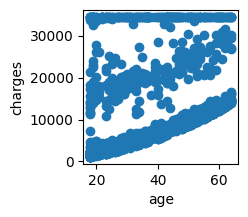

In [27]:
# Scatter Plot
plt.figure(figsize=(2, 2))
plt.scatter(df["age"], df["charges"])
plt.xlabel("age")
plt.ylabel("charges")
plt.show()

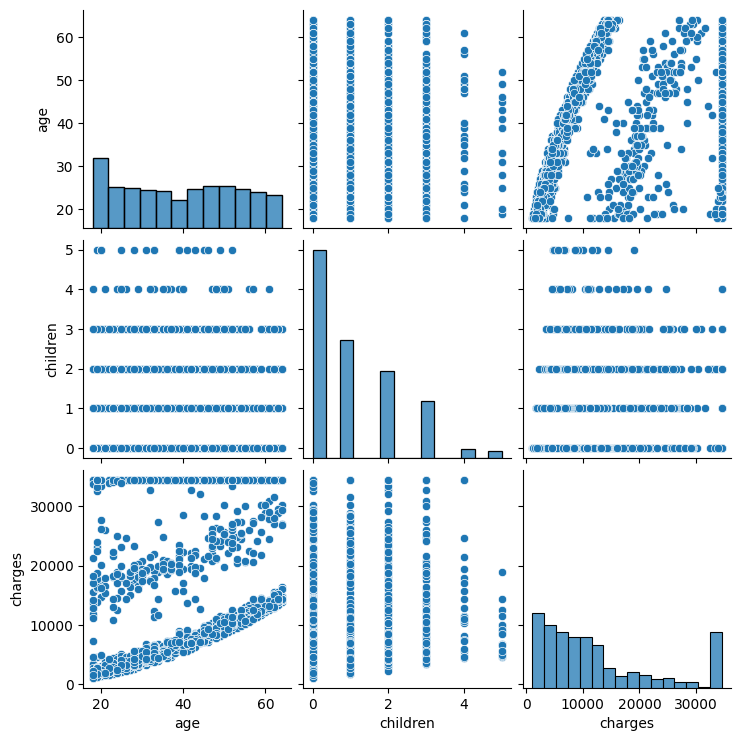

In [28]:
#Pair Plot
sns.pairplot(df)

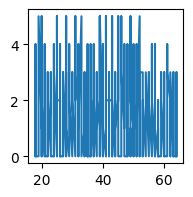

In [29]:
# Line Plot
sorted_df = df.sort_values(by="age")
plt.figure(figsize=(2, 2))
plt.plot(sorted_df["age"], sorted_df["children"])
plt.show()

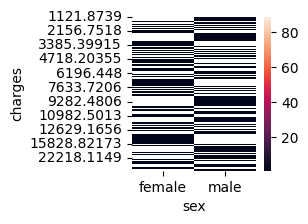

In [31]:
# Heat map
plt.figure(figsize=(2, 2))
agg = df.pivot_table(index="charges", columns="sex", values="age", aggfunc=len)
sns.heatmap(agg)
plt.show()

In [32]:
X = df.drop("charges", axis=1)
y = df[["charges"]]

In [33]:
X

,age,sex,children,smoker,region
0,19,female,0,yes,southwest
1,18,male,1,no,southeast
2,28,male,3,no,southeast
3,33,male,0,no,northwest
4,32,male,0,no,northwest
...,...,...,...,...,...
1333,50,male,3,no,northwest
1334,18,female,0,no,northeast
1335,18,female,0,no,southeast
1336,21,female,0,no,southwest


In [34]:
y

,charges
0,16884.92400
1,1725.55230
2,4449.46200
3,21984.47061
4,3866.85520
...,...
1333,10600.54830
1334,2205.98080
1335,1629.83350
1336,2007.94500


In [35]:
from sklearn.preprocessing import MinMaxScaler
num_cols = X.select_dtypes("number").columns
scaler = MinMaxScaler()
scaler.fit(X[num_cols])
X[num_cols] = scaler.transform(X[num_cols])
X

,age,sex,children,smoker,region
0,0.021739,female,0.0,yes,southwest
1,0.000000,male,0.2,no,southeast
2,0.217391,male,0.6,no,southeast
3,0.326087,male,0.0,no,northwest
4,0.304348,male,0.0,no,northwest
...,...,...,...,...,...
1333,0.695652,male,0.6,no,northwest
1334,0.000000,female,0.0,no,northeast
1335,0.000000,female,0.0,no,southeast
1336,0.065217,female,0.0,no,southwest


In [37]:
str_cols = ["sex", "region","smoker"]
pd.DataFrame(X[str_cols].nunique()).T

,sex,region,smoker
0,2,4,2


In [38]:
from category_encoders import OneHotEncoder
encoder = OneHotEncoder(cols = str_cols, drop_invariant=True)
X = encoder.fit_transform(X)

In [39]:
X

,age,sex_1,sex_2,children,smoker_1,smoker_2,region_1,region_2,region_3,region_4
0,0.021739,1,0,0.0,1,0,1,0,0,0
1,0.000000,0,1,0.2,0,1,0,1,0,0
2,0.217391,0,1,0.6,0,1,0,1,0,0
3,0.326087,0,1,0.0,0,1,0,0,1,0
4,0.304348,0,1,0.0,0,1,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...
1333,0.695652,0,1,0.6,0,1,0,0,1,0
1334,0.000000,1,0,0.0,0,1,0,0,0,1
1335,0.000000,1,0,0.0,0,1,0,1,0,0
1336,0.065217,1,0,0.0,0,1,1,0,0,0
